In [14]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import mysql.connector as mysql
from db import DB
db = DB(username="gaurav", password="gaurav", hostname="35.232.148.19",
            dbname="thingstodo", dbtype="mysql")

In [16]:
x=db.tables.things

Refreshing schema. Please wait...done!


In [17]:
df=db.query("SELECT * FROM things WHERE city='newdelhi'")

In [18]:
name_list=df.name.tolist()

In [19]:
from math import sin, cos, sqrt, atan2, radians
R = 6373.0

In [20]:
cities=np.arange(0,76)
adjacency_mat=np.zeros((76, 76))

In [21]:
for i in range(76):
    for j in range(i+1,76):
        lat1 = radians(float(df.iloc[i][3]))
        lon1 = radians(float(df.iloc[i][4]))
        lat2 = radians(float(df.iloc[j][3]))
        lon2 = radians(float(df.iloc[j][4]))

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        time=(distance/40)*60  #mins
        adjacency_mat[i][j]=round(time,2)
        adjacency_mat[j][i]=round(time,2)

In [22]:
adjacency_mat

array([[ 0.  , 16.1 ,  7.42, ..., 36.58, 16.12,  4.87],
       [16.1 ,  0.  , 23.43, ..., 22.66,  0.56, 11.31],
       [ 7.42, 23.43,  0.  , ..., 42.96, 23.42, 12.29],
       ...,
       [36.58, 22.66, 42.96, ...,  0.  , 22.3 , 32.54],
       [16.12,  0.56, 23.42, ..., 22.3 ,  0.  , 11.37],
       [ 4.87, 11.31, 12.29, ..., 32.54, 11.37,  0.  ]])

In [23]:
df

,id,name,rating,lat,lng,address,avgtime,imagelink,city,type,cost,closed,openinghours,description,updated_at,created_at,blogid,country,tags,embedingLink,googlemaplinks,kind,category,timeofday,agegroup,priority,travelertype,sourceofrating,totalgooglereview,normalvideolink,reacbeforerange,nextplace,catchyheading,showtime,tip,openingmonths
0,3,India Gate,4.6,28.6129,77.2295,"Rajpath, India Gate, New Delhi, Delhi 110001, ...",5400,/static/img/drive/things/3.jpg,newdelhi,Historical,0,,,Your trip to Delhi or India for that matter is...,2020-06-24 06:33:56,2020-04-05 19:04:53,4,india,"India Gate, All India War Memorial","<iframe src=""https://www.youtube.com/embed/KMp...",https://www.google.com/maps/place/India+Gate/@...,Sightseeing,Historical,Day,"Child, Young, Aged",Must,"Solo, Family, Couple",Google,189679,None,,111,,,If you're at Indian Gate and the weather is ri...,
1,4,Qutub Minar,4.5,28.5245,77.1855,"Seth Sarai, Mehrauli, New Delhi, Delhi 110030",9000,/static/img/drive/things/4.jpg,newdelhi,Religious,35,,7:00-17:00,"Delhi is not just about Mughal architecture, j...",2020-06-23 07:04:57,2020-04-06 12:00:30,4,india,Qutub Minar,"<iframe src=""https://www.youtube.com/embed/2Uo...",https://www.google.com/maps/place/Qutub+Minar/...,Sightseeing,Historical,Day,"Child, Young, Aged",Must,"Solo, Family, Couple",Google,93313,None,,,,,Visiting Qutub Minar involves a lot of walking...,
2,6,Red Fort,4.4,28.6562,77.2410,"Netaji Subhash Marg, Lal Qila, Chandni Chowk, ...",10800,/static/img/drive/things/6.jpg,newdelhi,Historical,0,0,1-6~9:30-16:30,"The epitome of Mughal Architecture, the pride ...",2020-06-23 07:04:25,2020-04-08 14:38:57,4,india,Red Fort,"<iframe src=""https://www.youtube.com/embed/SMz...",https://www.google.com/maps/place/Red+Fort/@28...,Sightseeing,Historical,Day,"Child, Young, Aged",Must,"Solo, Family, Couple",Google,100278,None,,"110,116",,,"If you're visiting this place in summers, do c...",
3,7,Humayun's Tomb,4.5,28.5933,77.2507,"Mathura Road Opposite, Hazrat Nizamuddin Aulia...",7200,/static/img/drive/things/7.jpg,newdelhi,Historical,0,,6:00-18:00,Unarguably one of the finest pieces of Mughal ...,2020-06-23 07:04:42,2020-04-10 17:22:19,4,india,Humayuns Tomb,"<iframe src=""https://www.youtube.com/embed/x53...",https://www.google.com/maps/place/Humayun%E2%8...,Sightseeing,Historical,Day,"Child, Young, Aged",Must,"Solo, Family, Couple",Google,27830,None,,,,,,
4,8,Hauz Khas Fort,4.4,28.549507,77.203613,"Hauz Khas, South Delhi, Delhi, 110016, India",14400,/static/img/drive/things/8.jpg,newdelhi,Historical,0,,10:30-19:00,"On the scale of 1 to 10, there's no reason to ...",2020-06-23 07:56:23,2020-04-10 17:25:23,4,india,"Hauz Khas Fort, Hauz Khas","<iframe src=""https://www.youtube.com/embed/pRW...",https://www.google.com/maps/place/Hauz+Khas+Co...,Sightseeing,Historical,Day,"Young, Aged",None,"Solo, Family, Couple",Google,587,None,,,,,,
5,9,Rashtrapati Bhawan,4.7,28.6143,77.1994,"Rashtrapati Bhawan, President's Estate, New De...",14400,/static/img/drive/things/9.jpg,newdelhi,Historical,0,,9:00-16:00,"Rashtrapati Bhawan, the royal residence of the...",2020-06-23 07:05:31,2020-04-10 17:31:40,4,india,"Rashtrapati Bhawan, Rashtrapati Bhavan",,https://www.google.com/maps/place/Rashtrapati...,Sightseeing,Historical,Day,"Child, Young, Aged",,"Solo, Family",Google,2969,"<iframe src=""https://www.youtube.com/embed/YhO...",,,,,If you're visiting this place do not miss wat...,
6,10,Jantar Mantar,4.1,28.6271,77.2166,"Connaught Place, Sansad Marg, New Delhi, Delhi...",3600,/static/img/drive/things/10.jpg,newdelhi,Historical,0,,6:00-18:00,"Built in 1724, by Maharaja Jai Singh II of Jai...",2020-06-23 07:03:07,2020-04-10 17:34:39,4,india,Jantar Mantar,"<iframe src=""https://www.youtube.com/embed/Eey...",https://www.google.com/maps/place/Jantar+Manta...,Sightseeing,Historical,Day,None,,None,Google,20345,None,,,,,Since it's difficult to understand the working...,
7,11,Purana Quila,4.2,28.6096,77.2437,"Mathura Rd, Pragati Maidan, New Delhi, Delh

In [24]:
# for i in range(76):
#     for j in range(i+1,76):
func= lambda x: 'True' if x=='Must' else 'False'
must_visit=df['priority'].apply(func).tolist()

In [25]:
must_visit_list=[]
for i in range(len(must_visit)):
    if must_visit[i]=='True':
        must_visit_list.append(i)   

In [26]:
must_visit_list

[0, 1, 2, 3, 7, 10, 11, 12, 14, 19, 26, 69]

In [27]:
for i in range(76):
    for k in range(len(must_visit_list)):
        adjacency_mat[k][i]=adjacency_mat[k][i]-2
        adjacency_mat[i][k]=adjacency_mat[i][k]-2

In [28]:
adjacency_mat

array([[-4.  , 12.1 ,  3.42, ..., 34.58, 14.12,  2.87],
       [12.1 , -4.  , 19.43, ..., 20.66, -1.44,  9.31],
       [ 3.42, 19.43, -4.  , ..., 40.96, 21.42, 10.29],
       ...,
       [34.58, 20.66, 40.96, ...,  0.  , 22.3 , 32.54],
       [14.12, -1.44, 21.42, ..., 22.3 ,  0.  , 11.37],
       [ 2.87,  9.31, 10.29, ..., 32.54, 11.37,  0.  ]])

In [29]:
class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat

In [30]:
def init_population(cities, adjacency_mat, n_population):
    return Population(
        np.asarray([np.random.permutation(cities) for _ in range(n_population)]), 
        adjacency_mat
    )

In [31]:
pop = init_population(cities, adjacency_mat, 76)
pop.bag

array([[36,  7,  2, ..., 73, 57, 16],
       [25, 54,  9, ..., 29,  6, 28],
       [19, 49, 35, ..., 15, 46, 58],
       ...,
       [22, 20, 15, ..., 35,  9, 39],
       [66, 26, 40, ..., 62, 57, 25],
       [50, 41, 13, ..., 64, 46, 28]])

In [32]:
def fitness(self, chromosome):
    return sum(
        [
            self.adjacency_mat[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )

Population.fitness = fitness

In [33]:
def evaluate(self):
    distances = np.asarray(
        [self.fitness(chromosome) for chromosome in self.bag]  #array of fitness of chromosomes
    )
    self.score = np.min(distances)                             #storing score info
    self.best = self.bag[distances.tolist().index(self.score)]
    self.parents.append(self.best)
    if False in (distances[0] == distances):
        distances = np.max(distances) - distances
    return distances / np.sum(distances) #returns the probability that the ith element in the population bag is chosen as a parent
    
Population.evaluate = evaluate

In [34]:
pop.evaluate()

array([0.01559516, 0.01266676, 0.01416176, 0.01965069, 0.01439281,
       0.01541847, 0.00793077, 0.00931342, 0.02050058, 0.00771875,
       0.01947492, 0.01854439, 0.01062812, 0.01362628, 0.0098181 ,
       0.00480304, 0.01825083, 0.00309602, 0.00311686, 0.01415542,
       0.00814641, 0.01142183, 0.01525448, 0.01236957, 0.01369333,
       0.01759393, 0.        , 0.00639499, 0.00776587, 0.01520374,
       0.0185761 , 0.00994314, 0.01671052, 0.01915055, 0.01886061,
       0.01907987, 0.01326114, 0.00952363, 0.00216549, 0.01783676,
       0.01240944, 0.00577796, 0.01527441, 0.0180977 , 0.00783291,
       0.00949373, 0.01404851, 0.01774434, 0.00580243, 0.01313067,
       0.008324  , 0.02002943, 0.00919654, 0.01630189, 0.02207351,
       0.01973858, 0.01315332, 0.0188289 , 0.01221917, 0.01379753,
       0.01260696, 0.00661788, 0.01305909, 0.00923188, 0.01307087,
       0.02825376, 0.01131854, 0.02178719, 0.01910887, 0.01546197,
       0.01199627, 0.00010963, 0.01165197, 0.01172808, 0.01588

In [35]:
pop.best  #best chromosome

array([46, 56,  0,  4, 74, 50, 17, 36, 57, 16,  6, 58, 55, 33, 31, 40, 39,
       49, 70, 30, 38,  7,  9,  1, 29, 45, 68, 37, 27, 47, 35, 25,  5, 11,
       19, 65, 20, 71, 44, 63, 60, 10, 24, 12, 14, 73, 18, 67, 32, 34, 51,
       48, 62, 75, 54,  2,  3, 69, 13, 53,  8, 59, 23, 42, 43, 64, 66, 22,
       72, 21, 41, 26, 52, 28, 15, 61])

In [36]:
pop.score  #scores represent the total distance a salesman has to travel to visit all the cities.

1109.9099999999999

In [37]:
#selecting parents using roulette selection method
def select(self, k=4):
    fit = self.evaluate()
    while len(self.parents) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
            self.parents.append(self.bag[idx])
    self.parents = np.asarray(self.parents)

Population.select = select

In [38]:
pop.select()
pop.parents

array([[46, 56,  0,  4, 74, 50, 17, 36, 57, 16,  6, 58, 55, 33, 31, 40,
        39, 49, 70, 30, 38,  7,  9,  1, 29, 45, 68, 37, 27, 47, 35, 25,
         5, 11, 19, 65, 20, 71, 44, 63, 60, 10, 24, 12, 14, 73, 18, 67,
        32, 34, 51, 48, 62, 75, 54,  2,  3, 69, 13, 53,  8, 59, 23, 42,
        43, 64, 66, 22, 72, 21, 41, 26, 52, 28, 15, 61],
       [46, 56,  0,  4, 74, 50, 17, 36, 57, 16,  6, 58, 55, 33, 31, 40,
        39, 49, 70, 30, 38,  7,  9,  1, 29, 45, 68, 37, 27, 47, 35, 25,
         5, 11, 19, 65, 20, 71, 44, 63, 60, 10, 24, 12, 14, 73, 18, 67,
        32, 34, 51, 48, 62, 75, 54,  2,  3, 69, 13, 53,  8, 59, 23, 42,
        43, 64, 66, 22, 72, 21, 41, 26, 52, 28, 15, 61],
       [50, 41, 13, 24, 66, 70, 17, 18, 29, 23, 53, 30,  2,  0, 12, 33,
         6, 56, 27, 40, 65, 21, 59, 55, 60,  7, 54, 61, 73,  9,  5, 20,
         8, 69, 38, 47, 57, 31, 35, 43, 37, 10, 42, 15, 75, 52, 72,  3,
        71, 25, 51, 36, 32, 11, 68, 48, 74, 22, 44,  4, 67, 14, 63, 19,
        45, 49,  1, 26

In [39]:
#swap mutation
def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

In [40]:
#crossover mutation
def crossover(self, p_cross=0.1):
    children = []
    count, size = self.parents.shape
    for _ in range(len(self.bag)):
        if np.random.rand() > p_cross:
            children.append(
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            parent1, parent2 = self.parents[
                np.random.randint(count, size=2), :
            ]
            idx = np.random.choice(range(size), size=2, replace=False)
            start, end = min(idx), max(idx)
            child = [None] * size
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            children.append(child)
    return children

Population.crossover = crossover


In [41]:
#wrapping up swap and crossover
def mutate(self, p_cross=0.1, p_mut=0.1):
    next_bag = []
    children = self.crossover(p_cross)
    for child in children:
        if np.random.rand() < p_mut:
            next_bag.append(swap(child))
        else:
            next_bag.append(child)
    return next_bag
    
Population.mutate = mutate

In [42]:
pop.mutate()

[[46,
  56,
  0,
  4,
  74,
  50,
  17,
  36,
  57,
  16,
  6,
  58,
  55,
  33,
  31,
  40,
  39,
  49,
  70,
  30,
  38,
  7,
  9,
  1,
  29,
  45,
  68,
  37,
  27,
  47,
  35,
  25,
  5,
  11,
  19,
  65,
  20,
  71,
  44,
  63,
  60,
  10,
  24,
  12,
  14,
  73,
  18,
  67,
  32,
  34,
  51,
  48,
  62,
  75,
  54,
  2,
  3,
  69,
  13,
  53,
  8,
  59,
  23,
  42,
  43,
  64,
  66,
  22,
  72,
  21,
  41,
  26,
  52,
  28,
  15,
  61],
 [46,
  56,
  0,
  4,
  74,
  50,
  17,
  36,
  57,
  16,
  12,
  58,
  55,
  33,
  31,
  40,
  39,
  49,
  70,
  30,
  38,
  7,
  9,
  1,
  29,
  45,
  68,
  37,
  27,
  47,
  35,
  25,
  5,
  11,
  19,
  65,
  20,
  71,
  44,
  63,
  60,
  10,
  24,
  6,
  14,
  73,
  18,
  67,
  32,
  34,
  51,
  48,
  62,
  75,
  54,
  2,
  3,
  69,
  13,
  53,
  8,
  59,
  23,
  42,
  43,
  64,
  66,
  22,
  72,
  21,
  41,
  26,
  52,
  28,
  15,
  61],
 [50,
  41,
  13,
  24,
  66,
  70,
  17,
  18,
  29,
  23,
  53,
  30,
  2,
  0,
  12,
  33,
  6,
  56,
 

In [43]:
def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=76,
    n_iter=20,
    selectivity=0.15,
    p_cross=0.5,
    p_mut=0.1,
    print_interval=100,
    return_history=False,
    verbose=False,
):
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

In [44]:
best, history = genetic_algorithm(
    cities,
    adjacency_mat,
    n_iter=3000,
    verbose=False,
    print_interval=1000,
    return_history=True,
)
print(best)

Generation 0: 1140.02
Generation 1000: 382.0699999999999
Generation 2000: 342.35999999999996
[29, 72, 49, 28, 41, 31, 42, 65, 60, 64, 2, 8, 21, 0, 52, 4, 45, 66, 23, 62, 6, 53, 43, 57, 16, 69, 13, 14, 19, 54, 26, 75, 68, 56, 3, 18, 71, 61, 24, 7, 10, 40, 37, 11, 46, 50, 25, 17, 47, 48, 44, 1, 74, 35, 63, 51, 20, 22, 5, 9, 67, 34, 58, 33, 12, 55, 59, 70, 32, 38, 36, 39, 15, 27, 73, 30]


In [45]:
it_dt=[]
for i in range(75):
    curr=best[i]
    next=best[i+1]
    it_dt.append(adjacency_mat[curr][next])

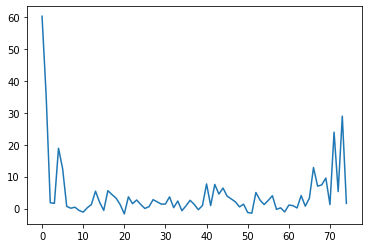

In [46]:
plt.plot(it_dt)

In [47]:
print(sum(it_dt), "mins")
print((sum(it_dt)/60), "hrs")

337.89 mins
5.6315 hrs
